<a href="https://colab.research.google.com/github/YekinData-Analysis/Attrition_analysis_ML_model/blob/main/heartml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [2]:

!ls -l

total 16
-rw-r--r-- 1 root root 11328 Sep 21 12:50 heart.csv
drwxr-xr-x 1 root root  4096 Sep 19 13:44 sample_data


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('heart.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
X=df.drop('target',axis=1)

y=df['target']

from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print("Training data Split (Train & Test)")
print(X_train.shape)
print(X_test.shape)

print("Target data Split (Train & Test)")
print(y_train.shape)
print(y_test.shape)

Training data Split (Train & Test)
(212, 13)
(91, 13)
Target data Split (Train & Test)
(212,)
(91,)


In [16]:
## Adding Validation data with Training
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=101)
print("Training data Split with  (Train & Test)")
print(X_train.shape)
print(y_train.shape)

print("Validation data Split (Train & Test)")
print(X_val.shape)
print(y_val.shape)

Training data Split with  (Train & Test)
(169, 13)
(169,)
Validation data Split (Train & Test)
(43, 13)
(43,)


In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(30, input_dim=13, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 1s 54ms/step - loss: 0.8547 - accuracy: 0.4320 - val_loss: 0.7976 - val_accuracy: 0.3736
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.7629 - accuracy: 0.4201 - val_loss: 0.7954 - val_accuracy: 0.4505
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 0.7515 - accuracy: 0.5266 - val_loss: 0.7839 - val_accuracy: 0.4945
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7287 - accuracy: 0.5444 - val_loss: 0.7510 - val_accuracy: 0.5055
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7029 - accuracy: 0.5148 - val_loss: 0.7204 - val_accuracy: 0.3956
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.6882 - accuracy: 0.5148 - val_loss: 0.6995 - val_accuracy: 0.5165
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6777 - accuracy: 0.5858 - val_loss: 0.6788 - val_accuracy: 0.5604
Epoch 8/100
6/6 [====

In [20]:
%matplotlib inline

import keras
from IPython.display import clear_output

In [21]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();

plot_losses = PlotLosses()


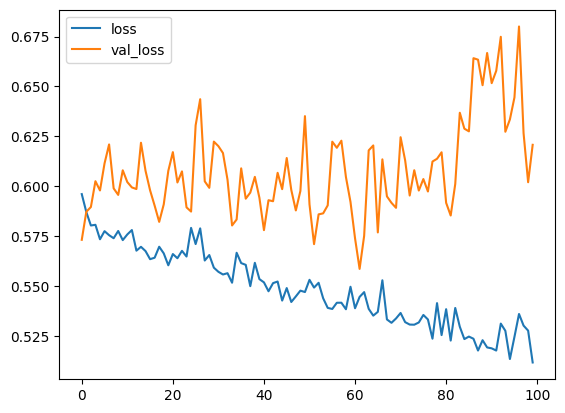

6/6 [==============================] - 0s 79ms/step - loss: 0.5116 - accuracy: 0.7456 - val_loss: 0.6207 - val_accuracy: 0.6047


In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#history = model.fit(df_input_train, df_target_train, epochs=100, verbose=1)

# Note: To print the live training graph, you need to add the callback function as below:
history = model.fit(X_train, y_train, epochs=100, callbacks=[plot_losses], verbose=1, validation_data=(X_val, y_val))


In [24]:

%matplotlib inline

import keras
from IPython.display import clear_output

In [25]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();

plot_losses = PlotLosses()

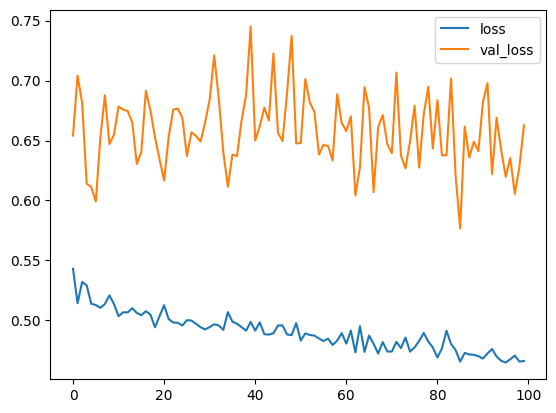

6/6 [==============================] - 0s 51ms/step - loss: 0.4661 - accuracy: 0.7811 - val_loss: 0.6626 - val_accuracy: 0.6047


In [26]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#history = model.fit(df_input_train, df_target_train, epochs=100, verbose=1)

# Note: To print the live training graph, you need to add the callback function as below:
history = model.fit(X_train, y_train, epochs=100, callbacks=[plot_losses], verbose=1, validation_data=(X_val, y_val))

In [27]:
class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

        clear_output(wait=True)

        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()

        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()

        plt.show();

plot_learn_loss_with_acc = PlotLearning()


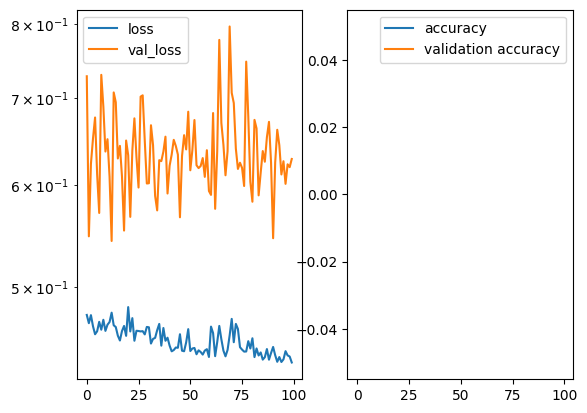

6/6 [==============================] - 1s 127ms/step - loss: 0.4367 - accuracy: 0.7988 - val_loss: 0.6282 - val_accuracy: 0.6047


In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#history = model.fit(df_input_train, df_target_train, epochs=100, verbose=1)

# Note: To print the live training graph, you need to add the callback function as below:
history = model.fit(X_train, y_train, epochs=100, callbacks=[plot_learn_loss_with_acc], verbose=1, validation_data=(X_val, y_val))

In [29]:

model.summary()
score = model.evaluate(X_train, y_train, verbose=0)
print('Model Accuracy = ',score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1061 (4.14 KB)
Trainable params: 1061 (4.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model Accuracy =  0.8047337532043457


In [31]:
!pip install comet_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.9/561.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.2/512.2 kB 29.3 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.6.2
    Uninstalling websocket-client-1.6.2:
      Successfully uninstalled websocket-client-1.6.2
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled python-box-7.1.1


In [32]:
from comet_ml import Experiment

In [34]:
#experiment = Experiment(api_key="7WDBPan0FAvda50xfHhxUsrhk", project_name="heartml.ipynb",workspace='yekindata-analysis')

experiment = Experiment(
    api_key="7WDBPan0FAvda50xfHhxUsrhk", ## "YOUR_COMET_ML_API_KEY_HERE",
    project_name="heartml.ipynb",
    workspace="yekindata-analysis",
    auto_metric_logging=True,
    auto_param_logging=True,
    log_graph=True,
    auto_metric_step_rate=True,
    parse_args=True,
    auto_histogram_weight_logging=True,
    auto_histogram_gradient_logging=True,
    auto_histogram_activation_logging=True,
    auto_histogram_epoch_rate=True,
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorflow, tensorboard, sklearn.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/yekindata-analysis/heartml-ipynb/654c1c6235c84fd9842ab6ab21f2c7c6
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorflow, tensorboard, sklearn.
COMET WARNING: